# Question 1

In [2]:
import pandas as pd
import numpy as np

# URL to the dataset
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user"

# Reading the dataset from the provided URL
users = pd.read_csv(url, sep='|')

# Discover the mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
print("Mean Age per Occupation:\n", mean_age_per_occupation)

# Discover the Male ratio per occupation and sort it from the most to the least
users['is_male'] = users['gender'].apply(lambda x: 1 if x == 'M' else 0)
male_ratio_per_occupation = users.groupby('occupation')['is_male'].mean().sort_values(ascending=False)
print("\nMale Ratio per Occupation:\n", male_ratio_per_occupation)

# For each occupation, calculate the minimum and maximum ages
min_age_per_occupation = users.groupby('occupation')['age'].min()
max_age_per_occupation = users.groupby('occupation')['age'].max()
print("\nMinimum Age per Occupation:\n", min_age_per_occupation)
print("\nMaximum Age per Occupation:\n", max_age_per_occupation)

# For each combination of occupation and sex, calculate the mean age
mean_age_per_occupation_sex = users.groupby(['occupation', 'gender'])['age'].mean()
print("\nMean Age per Occupation and Gender:\n", mean_age_per_occupation_sex)

# For each occupation present the percentage of women and men
total_count_per_occupation = users.groupby('occupation')['gender'].count()
female_count_per_occupation = users[users['gender'] == 'F'].groupby('occupation')['gender'].count()
male_count_per_occupation = users[users['gender'] == 'M'].groupby('occupation')['gender'].count()
female_percentage = (female_count_per_occupation / total_count_per_occupation).fillna(0) * 100
male_percentage = (male_count_per_occupation / total_count_per_occupation).fillna(0) * 100
print("\nPercentage of Women per Occupation:\n", female_percentage)
print("\nPercentage of Men per Occupation:\n", male_percentage)


Mean Age per Occupation:
 occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Male Ratio per Occupation:
 occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0

# Question 2

In [5]:
import pandas as pd

# Import the dataset
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url)

# Select only the Goal column
goals = euro12['Goals']
print("Goals:\n", goals.head())

# How many teams participated in the Euro2012?
num_teams = euro12['Team'].nunique()
print("\nNumber of Teams that participated in the Euro2012:", num_teams)

# What is the number of columns in the dataset?
num_columns = euro12.shape[1]
print("\nNumber of Columns in the dataset:", num_columns)

# View only the columns Team, Yellow Cards and Red Cards
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print("\nDiscipline DataFrame:\n", discipline.head())

# Sort the teams by Red Cards, then to Yellow Cards
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
print("\nDiscipline Sorted:\n", discipline_sorted.head())

# Calculate the mean Yellow Cards given per Team
mean_yellow_cards = discipline['Yellow Cards'].mean()
print("\nMean Yellow Cards Given per Team:", mean_yellow_cards)

# Filter teams that scored more than 6 goals
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
print("\nTeams with more than 6 goals:\n", teams_more_than_6_goals)

# Select the teams that start with G
teams_start_with_G = euro12[euro12['Team'].str.startswith('G')]
print("\nTeams starting with G:\n", teams_start_with_G)

# Select the first 7 columns
first_7_columns = euro12.iloc[:, :7]
print("\nFirst 7 Columns:\n", first_7_columns.head())

# Select all columns except the last 3
all_but_last_3 = euro12.iloc[:, :-3]
print("\nAll columns except last 3:\n", all_but_last_3.head())

# Shooting Accuracy from England, Italy, and Russia
shooting_accuracy = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
print("\nShooting Accuracy:\n", shooting_accuracy)


Goals:
 0    4
1    4
2    4
3    5
4    3
Name: Goals, dtype: int64

Number of Teams that participated in the Euro2012: 16

Number of Columns in the dataset: 35

Discipline DataFrame:
              Team  Yellow Cards  Red Cards
0         Croatia             9          0
1  Czech Republic             7          0
2         Denmark             4          0
3         England             5          0
4          France             6          0

Discipline Sorted:
            Team  Yellow Cards  Red Cards
2       Denmark             4          0
5       Germany             4          0
3       England             5          0
8   Netherlands             5          0
15      Ukraine             5          0

Mean Yellow Cards Given per Team: 7.4375

Teams with more than 6 goals:
        Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5   Germany     10               32                32             47.8%   
13    Spain     12               42                33            

# Question 3

In [7]:
# Step 1: Import the necessary libraries

import pandas as pd
import numpy as np

# Step 2: Create 3 different Series, each of length 100
np.random.seed(0)  
series1 = pd.Series(np.random.randint(1, 5, 100))  # Random numbers from 1 to 4
series2 = pd.Series(np.random.randint(1, 4, 100))  # Random numbers from 1 to 3
series3 = pd.Series(np.random.randint(10000, 30001, 100))  # Random numbers from 10000 to 30000
print("Series 1:\n", series1.head())
print("Series 2:\n", series2.head())
print("Series 3:\n", series3.head())

# Step 3: Create a DataFrame by joining the Series by column
housing = pd.concat([series1, series2, series3], axis=1)
print("\nHousing DataFrame:\n", housing.head())

# Step 4: Change the name of the columns
housing.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print("\nHousing DataFrame with Renamed Columns:\n", housing.head())

# Step 5: Create a one column DataFrame with the values of the 3 Series
bigcolumn = pd.concat([series1, series2, series3], axis=0).to_frame()
bigcolumn.columns = ['bigcolumn']
print("\nBigcolumn DataFrame:\n", bigcolumn.head())

# Step 6: Check if the index goes only until 99
index_check = bigcolumn.index[-1]  # Get the last index
print("\nLast index before reindexing:", index_check)

# Step 7: Reindex the DataFrame so it goes from 0 to 299
bigcolumn.reset_index(drop=True, inplace=True)

# Print the head and tail of the DataFrame to show the full range of indices
print("\nBigcolumn DataFrame after reindexing - first few rows:\n", bigcolumn.head())
print("\nBigcolumn DataFrame after reindexing - last few rows:\n", bigcolumn.tail())



Series 1:
 0    1
1    4
2    2
3    1
4    4
dtype: int32
Series 2:
 0    2
1    3
2    1
3    1
4    3
dtype: int32
Series 3:
 0    15021
1    11134
2    26409
3    19680
4    27340
dtype: int32

Housing DataFrame:
    0  1      2
0  1  2  15021
1  4  3  11134
2  2  1  26409
3  1  1  19680
4  4  3  27340

Housing DataFrame with Renamed Columns:
    bedrs  bathrs  price_sqr_meter
0      1       2            15021
1      4       3            11134
2      2       1            26409
3      1       1            19680
4      4       3            27340

Bigcolumn DataFrame:
    bigcolumn
0          1
1          4
2          2
3          1
4          4

Last index before reindexing: 99

Bigcolumn DataFrame after reindexing - first few rows:
    bigcolumn
0          1
1          4
2          2
3          1
4          4

Bigcolumn DataFrame after reindexing - last few rows:
      bigcolumn
295      28161
296      29745
297      18338
298      24676
299      12562


# Question 4

In [13]:
import pandas as pd
import numpy as np

# Step 1: Import necessary libraries
# (Pandas and Numpy already imported)

# Step 2: Import the dataset
data = pd.read_csv('E:\\Download\\wind.txt', sep="\s+", parse_dates=[[0, 1, 2]])

# Step 3: Replace the first 3 columns by a proper datetime index
data.rename(columns={"Yr_Mo_Dy": "Date"}, inplace=True)
print("Data after renaming columns:\n", data.head())

# Step 4: Fix Year 2061
def fix_year(x):
    year = x.year - 100 if x.year > 1979 else x.year
    return pd.Timestamp(year, x.month, x.day)
data['Date'] = data['Date'].apply(fix_year)

# Step 5: Set the right dates as the index
data.set_index('Date', inplace=True)
print("\nData after setting the right index:\n", data.head())

# Step 6: Compute missing values for each location
missing_values = data.isnull().sum()
print("\nMissing values for each location:\n", missing_values)

# Step 7: Compute non-missing values
non_missing_values = data.notnull().sum().sum()
print("\nNon-missing values in total:", non_missing_values)

# Step 8: Calculate mean windspeeds
mean_windspeed = data.mean().mean()
print("\nMean windspeed over all locations and all times:", mean_windspeed)

# Step 9: Location statistics
loc_stats = data.describe().T[['min', 'max', 'mean', 'std']]
print("\nStatistics for each location:\n", loc_stats.head())

# Step 10: Daily statistics
day_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)
print("\nDaily statistics:\n", day_stats.head())

# Step 11: Average windspeed in January
january_winds = data[data.index.month == 1].mean()
print("\nAverage windspeed in January for each location:\n", january_winds)

# Step 12: Yearly frequency
yearly_freq = data.resample('A').mean()
print("\nYearly frequency:\n", yearly_freq.head())

# Step 13: Monthly frequency
monthly_freq = data.resample('M').mean()
print("\nMonthly frequency:\n", monthly_freq.head())

# Step 14: Weekly frequency
weekly_freq = data.resample('W').mean()
print("\nWeekly frequency:\n", weekly_freq.head())

# Step 15: Statistics for the first 52 weeks
first_year = data.loc['1961']
stats_first_52_weeks = first_year.resample('W').agg(['min', 'max', 'mean', 'std']).iloc[0:52]
print("\nStatistics for the first 52 weeks:\n", stats_first_52_weeks.head())


Data after renaming columns:
         Date    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0 2061-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1 2061-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2 2061-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
3 2061-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
4 2061-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

     CLO    BEL    MAL  
0  12.58  18.50  15.04  
1   9.67  17.54  13.83  
2   7.67  12.75  12.71  
3   5.88   5.46  10.88  
4  10.34  12.92  11.83  

Data after setting the right index:
               RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
Date                                                                       
1961-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
1961-01-0

# Question 5

In [15]:
import pandas as pd

# Step 2: Import the dataset
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep='\t')

# Step 4: See the first 10 entries
print("First 10 Entries:\n", chipo.head(10))

# Step 5: Number of observations in the dataset
print("\nNumber of Observations:", chipo.shape[0])

# Step 6: Number of columns in the dataset
print("\nNumber of Columns:", chipo.shape[1])

# Step 7: Print the names of all the columns
print("\nColumn Names:", chipo.columns.tolist())

# Step 8: How is the dataset indexed?
print("\nDataset Index:", chipo.index)

# Step 9 and 10: Most-ordered item and number of items ordered
most_ordered = chipo.groupby('item_name').quantity.sum().idxmax()
most_ordered_qty = chipo.groupby('item_name').quantity.sum().max()
print("\nMost Ordered Item:", most_ordered)
print("Number of Items Ordered for Most Ordered Item:", most_ordered_qty)

# Step 11: Most ordered item in the choice_description column
most_ordered_choice = chipo.groupby('choice_description').quantity.sum().idxmax()
print("\nMost Ordered Item in Choice Description:", most_ordered_choice)

# Step 12: Total items ordered
total_items_ordered = chipo.quantity.sum()
print("\nTotal Items Ordered:", total_items_ordered)

# Step 13: Turn the item price into a float
chipo['item_price'] = chipo['item_price'].replace('[\$,]', '', regex=True).astype(float)
print("\nItem Price Type:", chipo['item_price'].dtype)

# Step 14: Revenue for the period
total_revenue = chipo['item_price'].sum()
print("\nTotal Revenue:", total_revenue)

# Step 15: Total number of orders
total_orders = chipo.order_id.nunique()
print("\nTotal Number of Orders:", total_orders)

# Step 16: Average revenue amount per order
average_revenue_per_order = total_revenue / total_orders
print("\nAverage Revenue per Order:", average_revenue_per_order)

# Step 17: Number of different items sold
different_items_sold = chipo.item_name.nunique()
print("\nNumber of Different Items Sold:", different_items_sold)

First 10 Entries:
    order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3           

# Question 6

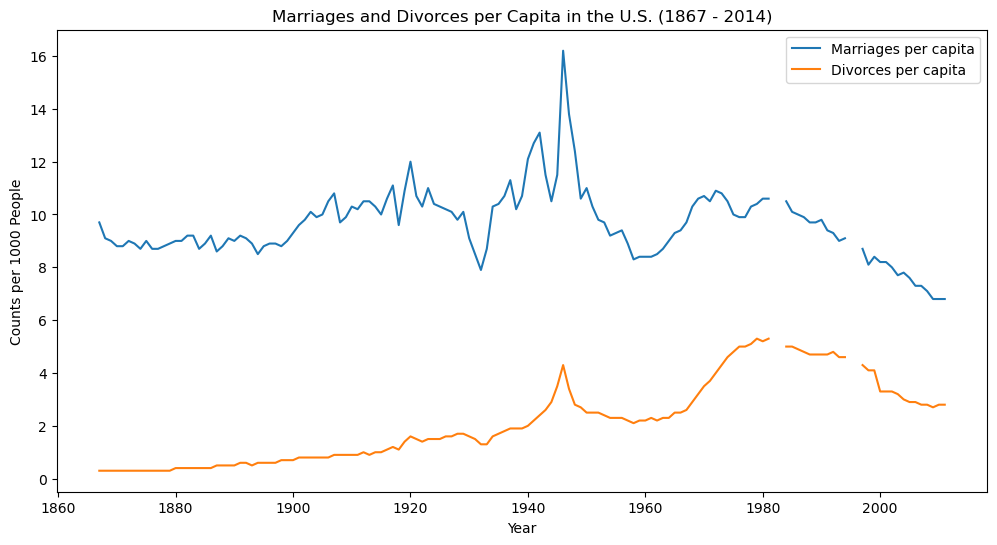

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the dataset
data = pd.read_csv(r'E:\Download\us-marriages-divorces-1867-2014.csv')

# Step 2: Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['Marriages_per_1000'], label='Marriages per capita')
plt.plot(data['Year'], data['Divorces_per_1000'], label='Divorces per capita')

# Step 3: Labeling
plt.title('Marriages and Divorces per Capita in the U.S. (1867 - 2014)')
plt.xlabel('Year')
plt.ylabel('Counts per 1000 People')
plt.legend()

# Step 4: Show the plot
plt.show()

# Question 7

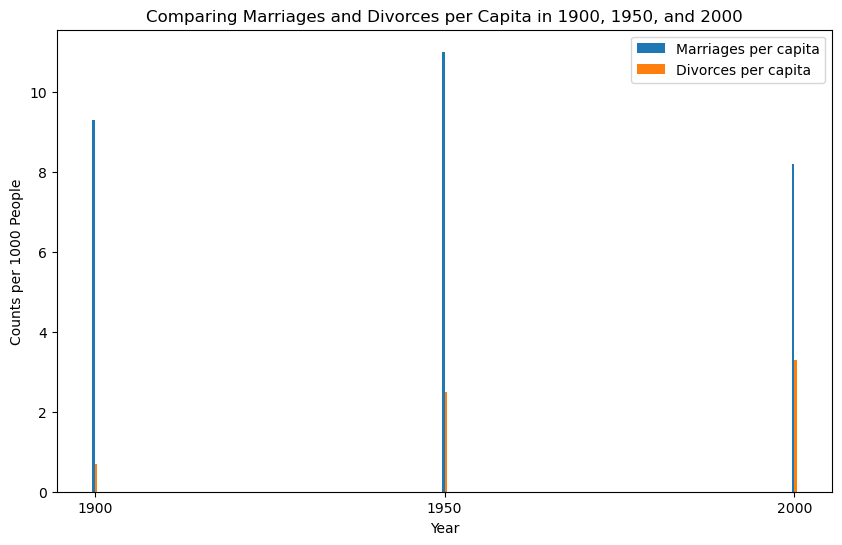

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the dataset
data = pd.read_csv('E:\\Download\\us-marriages-divorces-1867-2014.csv')

# Step 2: Filter data for the years 1900, 1950, and 2000
selected_years = data[data['Year'].isin([1900, 1950, 2000])]

# Step 3: Create a vertical bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = selected_years['Year']

bar1 = plt.bar(index, selected_years['Marriages_per_1000'], bar_width, label='Marriages per capita')
bar2 = plt.bar(index + bar_width, selected_years['Divorces_per_1000'], bar_width, label='Divorces per capita')

# Step 4: Labeling
plt.xlabel('Year')
plt.ylabel('Counts per 1000 People')
plt.title('Comparing Marriages and Divorces per Capita in 1900, 1950, and 2000')
plt.xticks(index + bar_width / 2, selected_years['Year'])
plt.legend()

# Step 5: Show the plot
plt.show()

# Question 8

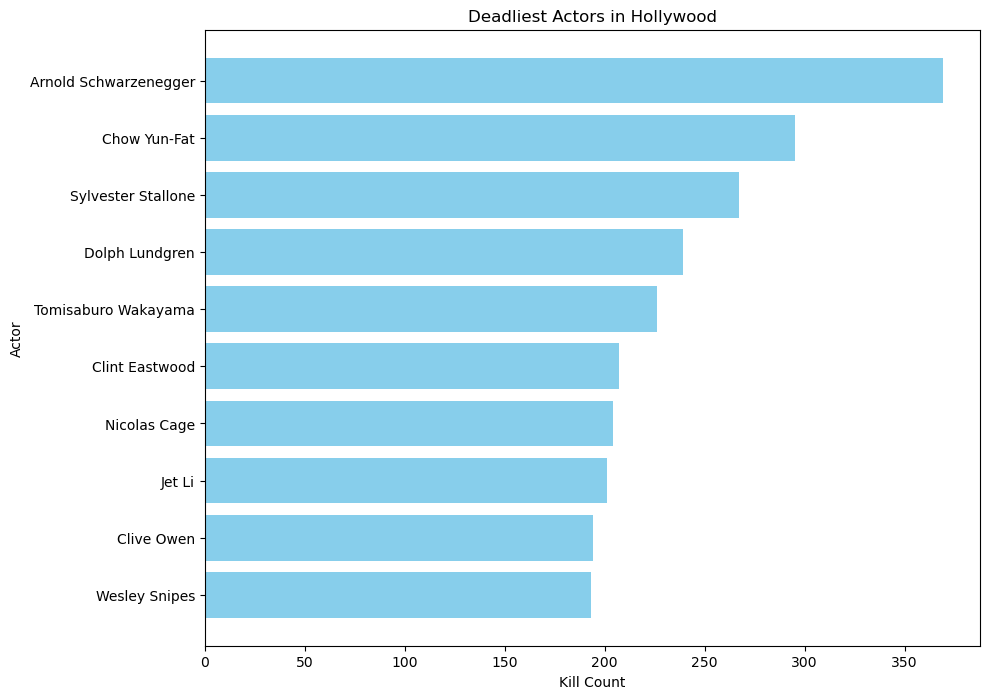

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the dataset
data = pd.read_csv('E:\\Download\\actor_kill_counts.csv')

# Step 2: Sort the actors by their kill count
sorted_data = data.sort_values('Count', ascending=True)

# Step 3: Create a horizontal bar chart
plt.figure(figsize=(10, 8))
plt.barh(sorted_data['Actor'], sorted_data['Count'], color='skyblue')
plt.xlabel('Kill Count')
plt.ylabel('Actor')
plt.title('Deadliest Actors in Hollywood')

# Step 4: Show the plot
plt.show()

# Question 9

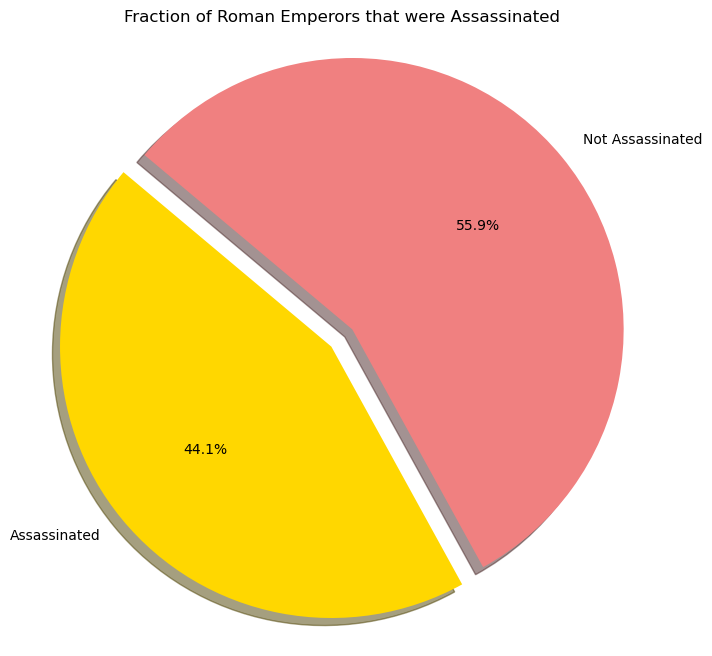

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the dataset
data = pd.read_csv('E:\\Download\\roman-emperor-reigns.csv')

# Step 2: Calculate the fraction of emperors who were assassinated
assassinated_count = data[data['Cause_of_Death'].apply(lambda x: 'assassinated' in x.lower())].shape[0]
total_emperors = data.shape[0]
not_assassinated_count = total_emperors - assassinated_count

# Step 3: Create a pie chart
labels = ['Assassinated', 'Not Assassinated']
sizes = [assassinated_count, not_assassinated_count]
colors = ['gold', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Fraction of Roman Emperors that were Assassinated')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Step 4: Show the plot
plt.show()

# Question 10

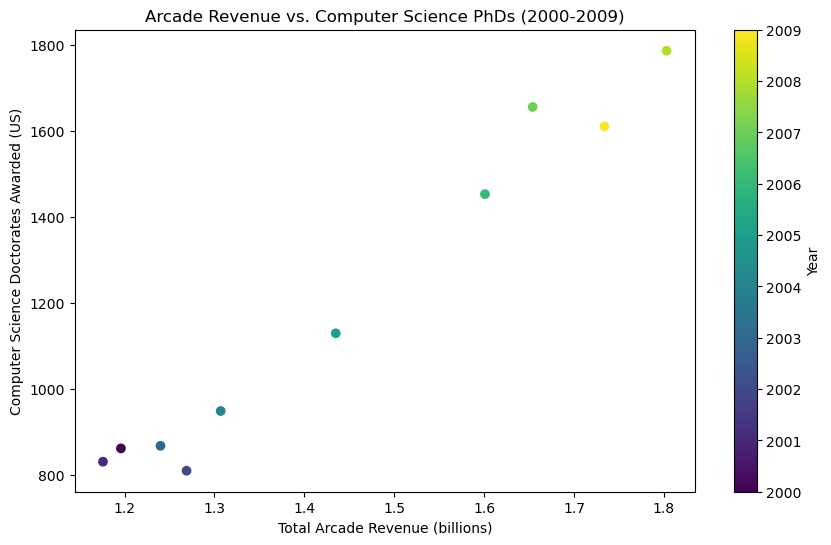

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Import the dataset
data = pd.read_csv('E:\\Download\\arcade-revenue-vs-cs-doctorates.csv')

# Step 2: Filter data for the years 2000-2009
filtered_data = data[(data['Year'] >= 2000) & (data['Year'] <= 2009)]

# Step 3: Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(filtered_data['Total Arcade Revenue (billions)'],
                      filtered_data['Computer Science Doctorates Awarded (US)'],
                      c=filtered_data['Year'],
                      cmap='viridis')

# Adding a color bar
plt.colorbar(scatter, label='Year')

# Step 4: Labeling
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Computer Science Doctorates Awarded (US)')
plt.title('Arcade Revenue vs. Computer Science PhDs (2000-2009)')

# Step 5: Show the plot
plt.show()